In [1]:
# Packages
import numpy as np
import sklearn as sk
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Preallocation
data = {}

# Loading .txt files 
for i in range(1,1001):
  with open('/Sketch-Data-master/SketchData/Domain01/{0}.txt'.format(i)) as f:
    lines = f.readlines()
    # Retrieve domain, class and user ids
    dom = lines[0].split(" ")[-1][:1]
    cla = lines[1].split(" ")[-1].split("\n")[0]
    use = lines[2].split(" ")[-1].split("\n")[0]

    # Check for right domain
    if dom != "1":
      print("Found data for domain {0} in file {1}".format(dom,i))
    # Check if the order of data insertion is the same for all files
    if lines[4].split('\n')[0].split(',') != ["<x>","<y>","<z>","<t>"]:
      print("Different order found in data insertion at index {0}".format(i))

    # Retrieve x, y, z and t data
    lines = lines[5:]
    x = []
    y = []
    z = []
    t = []
    for line in lines:
      line = line.split('\n')[0].split(',')
      x.append(float(line[0]))
      y.append(float(line[1]))
      z.append(float(line[2]))
      t.append(float(line[3]))
    # Insert data in the main dico
    if use not in data.keys():
      data[use] = {}
      data[use][cla] = {'x':[x], 'y':[y], 'z':[z], 't':[t]}
    else:
      if cla not in data[use].keys():
        data[use][cla] = {'x':[x], 'y':[y], 'z':[z], 't':[t]}
      else:
        data[use][cla]['x'].append(x)
        data[use][cla]['y'].append(y)
        data[use][cla]['z'].append(z)
        data[use][cla]['t'].append(t)

# Data is a dictionnary with the class as main key, the user a sub-key and the x,y,z,t values then

## Exploration of the data

In [ ]:
coord=['x','y','z']
data_graph = []
for i in coord:
    data_graph.append(data["1"]["4"][i][1])

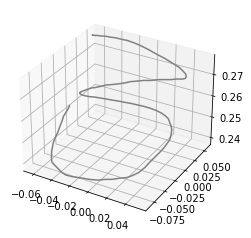

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xline = data_graph[0]
yline = data_graph[1]
zline = data_graph[2]

ax.plot3D(xline, yline, zline, 'gray')

## Re-scaling of the data

In [ ]:
from copy import deepcopy
db = deepcopy(data)

In [ ]:
def norm_MinMax(vector):
    min_v, max_v = min(vector),max(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i]-min_v)/(max_v-min_v)
    return vector

In [ ]:
x = np.copy(data['1']['1']['x'][1])
print("Min : {} / Max : {}".format(min(x), max(x)))

Min : -0.0587 / Max : 0.084336


In [ ]:
for k1 in db.keys():
    for k2 in db[k1].keys():
        for dim in db[k1][k2].keys():
            for i in range(10):
                db[k1][k2][dim][i] = norm_MinMax(db[k1][k2][dim][i])

In [ ]:
x = np.copy(db['1']['1']['x'][1])
print("Min : {} / Max : {}".format(min(x), max(x)))

Min : 0.0 / Max : 1.0


## Splitting of the space

In [ ]:
def get_block(x,y,z,n):
    return get_x_block(x,n) + get_y_block(y,n) + get_z_block(z,n)
    
def get_x_block(x,n):
    for i in range(1,n+1):
        if x<=i/n: return i

def get_y_block(y,n):
    for i in range(1,n+1):
        if y<=i/n: return (i-1)*n

def get_z_block(z,n):
    for i in range(1,n+1):
        if z<=i/n: return (i-1)*n*n

In [ ]:
# Test
get_block(0.2,0.7,0.5,3)

16

In [ ]:
from PIL import Image
im = Image.open('séparation espace.png')
im.show()

## Préparation des inputs

In [ ]:
import pandas as pd

nb_split_space = 10

min_length = []
label = []
pre_db = []
for k1 in db.keys():
    for k2 in db[k1].keys():
        for i in range(10):
            row = []
            for p in range(0,len(db[k1][k2]['x'][i])):
                row.append(get_block(db[k1][k2]['x'][i][p],db[k1][k2]['y'][i][p],db[k1][k2]['z'][i][p],nb_split_space))
            min_length.append(len(row))
            pre_db.append(row)
            label.append(int(k2)-1)

(array([107., 207., 358., 198.,  88.,  32.,   7.,   2.,   0.,   1.]),
 array([ 31. ,  51.9,  72.8,  93.7, 114.6, 135.5, 156.4, 177.3, 198.2,
        219.1, 240. ]),
 <BarContainer object of 10 artists>)

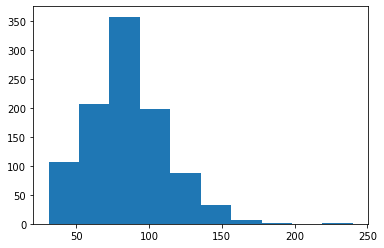

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(min_length)

In [ ]:
def reshape(liste,seuil):
    output = []
    for seq in liste:
        if len(seq) > seuil:
            new, pas = [], len(seq)/seuil
            real = 0
            for i in range(seuil):
                new.append(seq[int(real)])
                real += pas
            output.append(new)
        else:
            output.append(seq)
    return np.array(output)

In [ ]:
a = [[1,2,3,4,5,6,7,8,9,10,11]]
reshape(a,7)

array([[ 1,  2,  4,  5,  7,  8, 10]])

In [ ]:
new_db = reshape(pre_db,min(min_length))
new_db.shape

(1000, 31)

In [ ]:
# Name of the features
features = []
for i in range(new_db.shape[1]):
    features.append("time_"+str(i+1))
#features

In [ ]:
database = pd.DataFrame(new_db, columns=features)

In [ ]:
y = pd.DataFrame(label, columns=['label'])
database = pd.concat([database,y],axis = 1)

In [ ]:
database

,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,...,time_23,time_24,time_25,time_26,time_27,time_28,time_29,time_30,time_31,label
0,898,898,897,897,896,895,994,993,982,971,...,30,50,70,280,390,499,699,698,798,0
1,140,140,140,160,170,289,498,696,895,993,...,7,8,19,29,29,39,50,150,150,0
2,30,30,40,50,180,389,698,797,895,994,...,8,18,29,29,40,150,150,150,250,0
3,599,589,589,599,698,698,797,896,895,993,...,40,50,170,380,480,590,589,689,689,0
4,981,981,981,981,961,951,941,821,611,312,...,797,896,895,894,993,992,982,981,981,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,489,489,598,595,694,792,891,881,861,641,...,979,969,949,840,620,510,410,310,210,9
996,579,689,788,897,896,994,993,971,961,741,...,980,960,850,640,530,320,210,210,110,9
997,469,469,569,577,686,894,992,981,971,851,...,970,850,740,530,420,310,210,110,10,9
998,980,989,996,992,971,742,635,537,538,539,...,870,649,539,429,319,209,109,110,10,9


## Mise en place du SVM

### En mélangeant tous les individus

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(database.drop('label',axis=1), database['label'], test_size=0.1, stratify=database['label'], random_state = 0)
print('x_train : {}'.format(x_train.shape))
print('y_train : {}'.format(y_train.shape))
print('x_test : {}'.format(x_test.shape))
print('y_test : {}'.format(y_test.shape))

x_train : (900, 31)
y_train : (900,)
x_test : (100, 31)
y_test : (100,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import LabelEncoder

In [ ]:
param_grid_rbf = { 'C': [0.1, 1, 10, 100, 1000],
                    'coef0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'gamma': ['scale'],
                    'kernel':['rbf']}

svc = SVC()
grid = GridSearchCV(svc, param_grid_rbf, cv=KFold(10))
grid_result = grid.fit(x_train,y_train)
print("Best: %s" % (grid_result.best_params_))

param_grid_sig = { 'C': [0.1, 1, 10, 100, 1000],
                    'gamma': ['scale'],
                    'kernel':['sigmoid']}

svc = SVC()
grid = GridSearchCV(svc, param_grid_sig, cv=KFold(10))
grid_result = grid.fit(x_train,y_train)
print("Best: %s" % (grid_result.best_params_))

param_grid_poly = { 'C': [0.1, 1, 10, 100, 1000],
                    'degree': [1, 5, 10, 15, 20],
                    'coef0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'gamma': ['scale'],
                    'kernel':['poly']}

svc = SVC()
grid = GridSearchCV(svc, param_grid_poly, cv=KFold(10))
grid_result = grid.fit(x_train,y_train)
print("Best: %s" % (grid_result.best_params_))

Best: {'C': 100, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best: {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
features = x_train.columns

svc = SVC(C=100, coef0=0, degree=2, gamma='scale',kernel='poly')
svc.fit(x_train,y_train)
train_acc = svc.score(x_train,y_train)
test_acc = svc.score(x_test,y_test)
print(" * Poly :")
print("Train score : {}".format(train_acc))
print("Test score : {}".format(test_acc))

svc = SVC(C=50, coef0= 0.0, gamma='scale',kernel='rbf')
svc.fit(x_train,y_train)
train_acc = svc.score(x_train,y_train)
test_acc = svc.score(x_test,y_test)
print(" * rbf :")
print("Train score : {}".format(train_acc))
print("Test score : {}".format(test_acc))

svc = SVC(C=100, gamma='scale',kernel='sigmoid')
svc.fit(x_train,y_train)
train_acc = svc.score(x_train,y_train)
test_acc = svc.score(x_test,y_test)
print(" * sigmoid :")
print("Train score : {}".format(train_acc))
print("Test score : {}".format(test_acc))

 * Poly :
Train score : 0.9111111111111111
Test score : 0.67
 * rbf :
Train score : 0.9311111111111111
Test score : 0.75
 * sigmoid :
Train score : 0.07
Test score : 0.1


In [ ]:
# Robustness of our model

param_grid_rbf = { 'C': [0.1, 1, 10, 100, 1000],
                    'coef0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'gamma': ['scale'],
                    'kernel':['rbf']}

res = 0
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(database.drop('label',axis=1), database['label'], test_size=0.1, stratify=database['label'], random_state = i)
    svc = SVC(C=100, coef0= 0.0, gamma='scale',kernel='rbf')
    svc.fit(x_train,y_train)
    train_acc = svc.score(x_train,y_train)
    test_acc = svc.score(x_test,y_test)
    res += test_acc/10
print('Test accuracy :  {}'.format(res))

Test accuracy :  0.609


### Separated Individuals 

In [ ]:
dic_db = {}
dic_min ={}
nb_split_space = 3
db = deepcopy(data)

for k1 in db.keys():
    for k2 in db[k1].keys():
        for dim in db[k1][k2].keys():
            for i in range(10):
                db[k1][k2][dim][i] = norm_MinMax(db[k1][k2][dim][i])

for k in db.keys():
    min_length = []
    label = []
    pre_db = []
    for k2 in db[k].keys():
        for i in range(10):
            row = []
            for p in range(0,len(db[k][k2]['x'][i])):
                row.append(get_block(db[k][k2]['x'][i][p],db[k][k2]['y'][i][p],db[k][k2]['z'][i][p],nb_split_space))
            min_length.append(len(row))
            pre_db.append(row)
            label.append(int(k2)-1)
    y = pd.DataFrame(label,columns=['label'])
    pre_db = reshape(pre_db,min(min_length))
    pre_db = pd.DataFrame(pre_db)
    dic_db[k] = pd.concat([pre_db,y],axis=1)

In [ ]:
for k in dic_db.keys():
    res = 0
    print(" * Individu {}:".format(k))
    for i in range(10):
        x_train, x_test, y_train, y_test = train_test_split(dic_db[k].drop('label',axis=1), dic_db[k]['label'], test_size=0.1, stratify=dic_db[k]['label'], random_state = i)
        
        svc = SVC()
        grid = GridSearchCV(svc, param_grid_rbf, cv=KFold(10))
        grid_result = grid.fit(x_train,y_train)
        params = grid_result.best_params_

        svc = SVC(C=params['C'], coef0=params['coef0'], gamma='scale',kernel='rbf')
        svc.fit(x_train,y_train)
        train_acc = svc.score(x_train,y_train)
        test_acc = svc.score(x_test,y_test)
        res += test_acc/10
    print('Test accuracy :  {}%'.format(round(res,2)*100))

 * Individu 1:
Test accuracy :  78.0%
 * Individu 2:
Test accuracy :  62.0%
 * Individu 3:
Test accuracy :  83.0%
 * Individu 4:
Test accuracy :  89.0%
 * Individu 5:
Test accuracy :  56.00000000000001%
 * Individu 6:
Test accuracy :  66.0%
 * Individu 7:
Test accuracy :  71.0%
 * Individu 8:
Test accuracy :  66.0%
 * Individu 9:
Test accuracy :  94.0%
 * Individu 10:
Test accuracy :  80.0%
